# Problema 8.16

Considerar la función de lazo abierto siguiente:

$$G=\frac{K_c}{0.5s+1} \mathrm{e}^{-t_d s}$$

Estudiar mediante los diagramas de Bode la influencia del retraso o del tiempo muerto $t_d$ y de la ganancia $K_c$ en la estabilidad del correspondiente lazo cerrado. Como ejemplo, considerar los casos en los que el retraso vale 0.01, 0.1 y 1 min.

---

**Solución**

En primer lugar cargamos las bibliotecas necesarias y definimos las variables que utilizaremos para resolver el problema, $K_c$ y $t_d$:

In [1]:
include("../clasecontrol.jl")
@vars td Kc positive=true

(td, Kc)

El siguiente paso es definir la función de lazo abierto, $G_{OL}$:

In [2]:
Gol = Kc/(0.5*s+1)*exp(-td*s)

    -s⋅td
Kc⋅ℯ     
─────────
0.5⋅s + 1

Para comprobar el efecto del retraso sobre la ganancia del controlador, calcularemos la ganancia última, $K_u$, para los tres valores de retraso propuestos en el enunciado del problema.

- $t_d = 0.01$

    Dibujamos el diagrama de Bode y encontramos $M = \frac{RA}{K_c(\omega_{co})}$, lo que significa que la ganancia última es:
    
    $$K_u = \frac{1}{M}$$

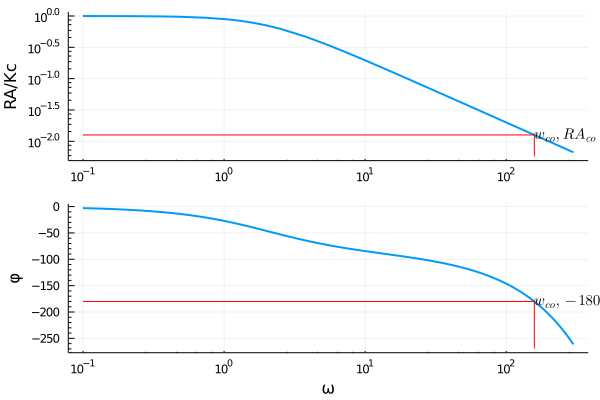

In [3]:
sol1 = bode(Gol(td=>0.01)/Kc; wmax=300, co= true, RAlabel="RA/Kc")
sol1.fig

In [4]:
# Ganancia última
round(1/sol1.RAco, sigdigits=3)

79.2

- $t_d = 0.1$

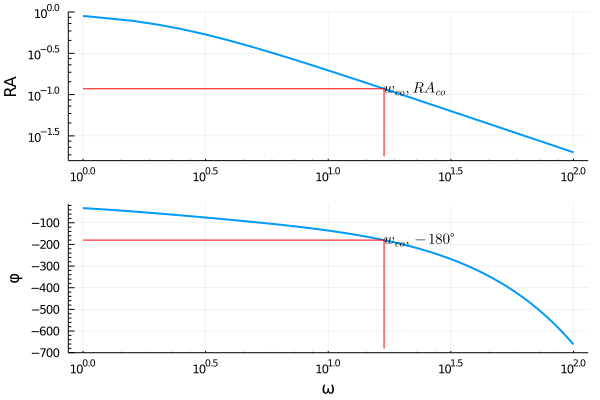

In [5]:
sol2 = bode(Gol(td=>0.1)/Kc; wmin=1, wmax=100, co=true)
sol2.fig

In [6]:
round(1/sol2.RAco, sigdigits=3)

8.5

- $t_d = 1$

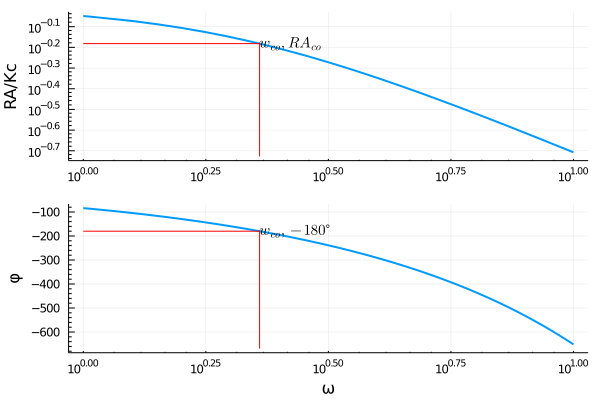

In [7]:
sol3 = bode(Gol(td=>1)/Kc; wmin=1, wmax=10, co=true, RAlabel="RA/Kc")
sol3.fig

In [8]:
round(1/sol3.RAco, sigdigits=3)

1.52

Se comprueba comprueba el efecto negativo del retraso sobre la estabilidad del lazo de control. Cuanto mayor es el retrasos, menor debe ser la ganancia proporcional última:

td | Kc
---|----
0.01 | 79.2
0.1 | 8.50
1 | 1.52 